In [2]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('data/adult.csv')

In [4]:
df=df[df['occupation'].values!='?']

In [5]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
df.drop(columns=['fnlwgt','race',],inplace=True)

In [7]:
df['income']=[1 if i=='>50K' else 0 for i in df['income']]

In [8]:
majority_data=df[df.income==0]
minority_data=df[df.income==1]
majority_data=majority_data.sample(n=8000,random_state=42)
balanced_data=pd.concat([majority_data,minority_data])

In [9]:
X=balanced_data.drop(columns=['income'])

In [10]:
y=balanced_data['income']

In [11]:
num_features=X.select_dtypes(exclude='str').columns
cat_features=X.select_dtypes(include='str').columns

In [12]:
numeric_transformers=StandardScaler()
oh_transformers=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ('onehotencoder',oh_transformers,cat_features),
        ('standardscaler',numeric_transformers,num_features)
    ]
)

In [13]:
X=preprocessor.fit_transform(X)

In [14]:
X.shape

(15650, 99)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(12520, 99)

In [16]:
def evaluate_model(true,predicted):
    f1score=f1_score(true,predicted)
    accuracy=accuracy_score(true,predicted)
    recall=recall_score(true,predicted)
    precision=precision_score(true,predicted)

    return f1score,accuracy,recall,precision


In [17]:
models={
    'RandomForestClassifier':RandomForestClassifier(),
    'LogisticRegression':LogisticRegression(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'CatBoostClassifier':CatBoostClassifier()
}

model_list=[]
accuracy_list=[]
for i in range(len(list(models))):

    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    train_f1_score,train_accuracy,train_recall,train_precision=evaluate_model(y_train,y_train_pred)
    test_f1_score,test_accuracy,test_recall,test_precision=evaluate_model(y_test,y_test_pred)

    print('----| ',list(models.keys())[i],' |----')
    model_list.append(list(models.keys())[i])

    print('Model Performance for training set')
    print('- F1_SCORE: {:.4f}'.format(train_f1_score))
    print('- ACCURACY :{:.4f}'.format(train_accuracy))
    print('- RECALL:',train_recall)
    print('- PRECISION : ',train_precision)

    print('-'*20)

    print('Model performance for Test set')
    print('- F1_SCORE: {:.4f}'.format(test_f1_score))
    print('- ACCURACY :{:.4f}'.format(test_accuracy))
    print('- RECALL:',test_recall)
    print('- PRECISION : ',test_precision)

    accuracy_list.append(test_accuracy)

    print('='*30)

    print('\n')


----|  RandomForestClassifier  |----
Model Performance for training set
- F1_SCORE: 0.9784
- ACCURACY :0.9788
- RECALL: 0.9817351598173516
- PRECISION :  0.9750566893424036
--------------------
Model performance for Test set
- F1_SCORE: 0.7976
- ACCURACY :0.8032
- RECALL: 0.7997364953886693
- PRECISION :  0.7955439056356488


----|  LogisticRegression  |----
Model Performance for training set
- F1_SCORE: 0.8207
- ACCURACY :0.8208
- RECALL: 0.8374103065883888
- PRECISION :  0.8047328005014888
--------------------
Model performance for Test set
- F1_SCORE: 0.8129
- ACCURACY :0.8150
- RECALL: 0.8287220026350461
- PRECISION :  0.797717184527584


----|  AdaBoostClassifier  |----
Model Performance for training set
- F1_SCORE: 0.8231
- ACCURACY :0.8218
- RECALL: 0.8462165688193085
- PRECISION :  0.8011425042457928
--------------------
Model performance for Test set
- F1_SCORE: 0.8170
- ACCURACY :0.8176
- RECALL: 0.8399209486166008
- PRECISION :  0.7953836556456644


----|  DecisionTreeClassi

In [19]:
pd.DataFrame(list(zip(model_list,accuracy_list)),columns=['models','accuracy']).sort_values(by=['accuracy'],ascending=False)

,models,accuracy
4,CatBoostClassifier,0.842812
2,AdaBoostClassifier,0.817572
1,LogisticRegression,0.815016
0,RandomForestClassifier,0.803195
3,DecisionTreeClassifier,0.775080


In [20]:
model=CatBoostClassifier()
models=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

Learning rate set to 0.030312
0:	learn: 0.6719316	total: 17.5ms	remaining: 17.4s
1:	learn: 0.6507887	total: 25.3ms	remaining: 12.6s
2:	learn: 0.6301400	total: 34ms	remaining: 11.3s
3:	learn: 0.6108096	total: 43.1ms	remaining: 10.7s
4:	learn: 0.5971513	total: 51.9ms	remaining: 10.3s
5:	learn: 0.5818302	total: 59.4ms	remaining: 9.83s
6:	learn: 0.5685511	total: 68.6ms	remaining: 9.73s
7:	learn: 0.5560099	total: 78.8ms	remaining: 9.77s
8:	learn: 0.5433325	total: 87.8ms	remaining: 9.67s
9:	learn: 0.5328654	total: 96.3ms	remaining: 9.54s
10:	learn: 0.5226073	total: 104ms	remaining: 9.34s
11:	learn: 0.5129502	total: 112ms	remaining: 9.2s
12:	learn: 0.5053392	total: 119ms	remaining: 9.07s
13:	learn: 0.4970402	total: 128ms	remaining: 8.98s
14:	learn: 0.4901673	total: 136ms	remaining: 8.91s
15:	learn: 0.4833519	total: 144ms	remaining: 8.83s
16:	learn: 0.4764400	total: 152ms	remaining: 8.78s
17:	learn: 0.4712071	total: 159ms	remaining: 8.69s
18:	learn: 0.4655721	total: 167ms	remaining: 8.6s
19:	l

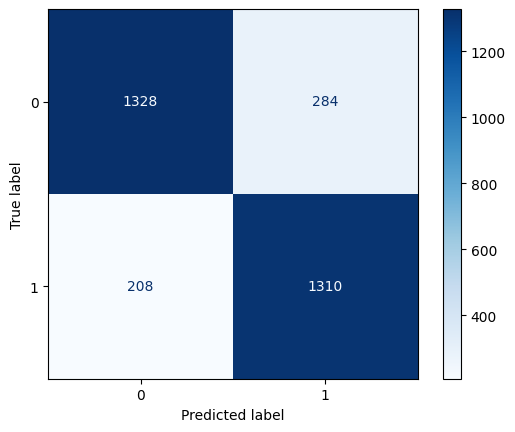

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

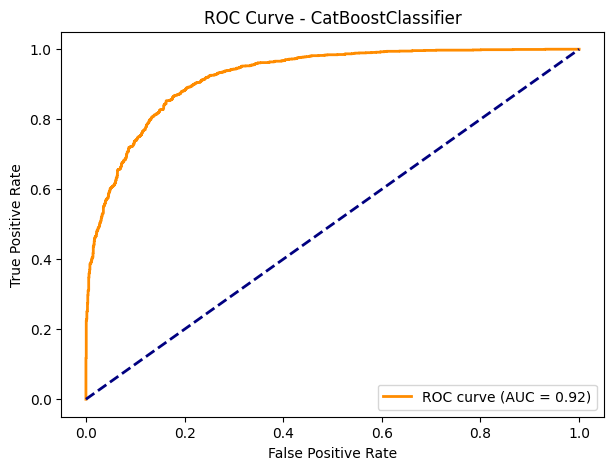

In [22]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

y_pred_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoostClassifier")
plt.legend(loc="lower right")
plt.show()
